# Visualize AST

In [18]:
import pandas as pd
import tree_sitter_python as tspython
from graphviz import Digraph
from IPython.display import SVG, display
from tree_sitter import Language, Parser

In [19]:
dataset = pd.read_csv("../../data/generated/dataset.csv")
dataset

,task,code,generated
0,c0df7d49-26f5-451c-b44a-1e0bca60bca5,\nn = 1\nwhile n:\n n = int(input())\n i...,1.0
1,c0df7d49-26f5-451c-b44a-1e0bca60bca5,\ncount = 0\nnum = input()\nwhile num != '0':\...,1.0
2,c0df7d49-26f5-451c-b44a-1e0bca60bca5,sequence = []\nwhile True:\n num = int(inpu...,1.0
3,4e5b21c0-e86f-4eac-82b6-1a0d00ae4199,a=[]\nwhile True:\n b=input()\n if b=='0':...,1.0
4,4e5b21c0-e86f-4eac-82b6-1a0d00ae4199,\nmax_val = float('-inf')\ncount = 0\n\nwhile ...,1.0
...,...,...,...
12423,49c03922-c57e-464a-8191-9ebef2615808,"a, b, c = map(int, input().split())\nif c > a ...",0.0
12424,2173e6e8-cca6-47c7-8ef6-ea93d3e736f4,"n,*a=map(int,open(0).read().split())\na=sorted...",0.0
12425,2a42d873-b1fe-4256-a488-91db4eaa8d9f,n=list(input())\nd=sorted(list(input()))\nif m...,0.0
12426,48f237db-e593-4be6-b3f9-10757a1d07ec,a=int(input())\nprint(a),0.0


In [20]:
code = b"""
a = 10
b = 5
if a<b:
    c = a
else:
    c = b
"""

# raw_code = dataset["code"].iloc[10]

# print(raw_code)

# code = raw_code.encode("utf-8")

SVG saved as ast_output.svg


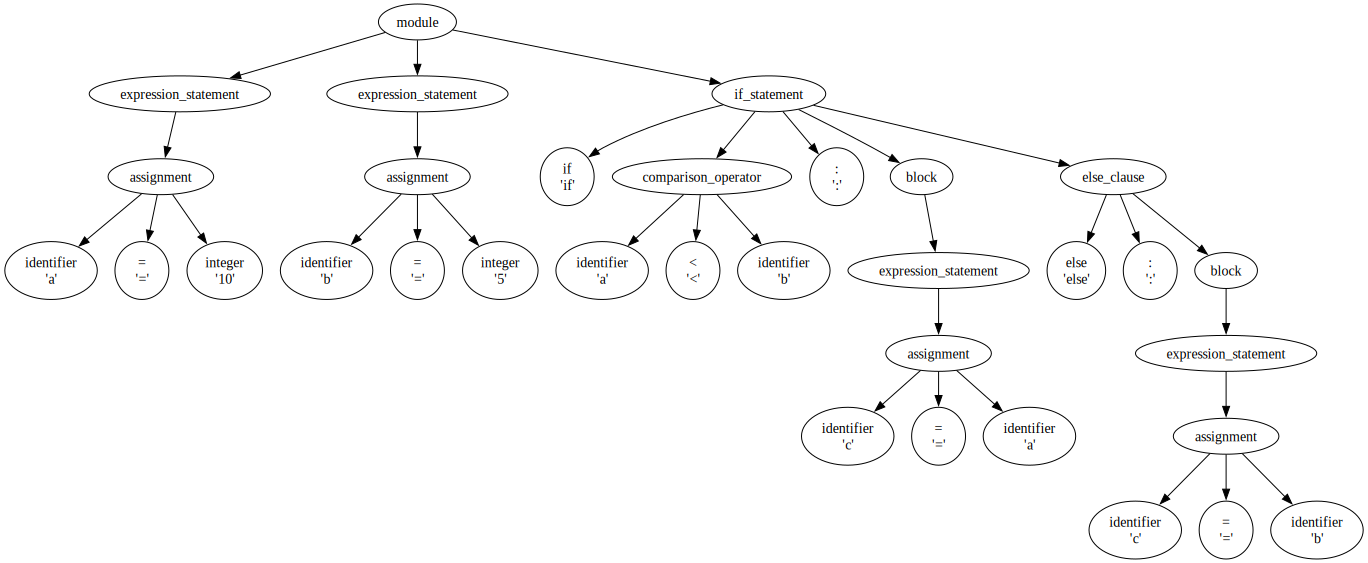

In [21]:
parser = Parser(Language(tspython.language()))

# Sample code

tree = parser.parse(code)
root_node = tree.root_node

# Graphviz setup
dot = Digraph(comment="AST")
node_id_counter = [0]


def add_node(graph, node, parent_id=None):
    current_id = str(node_id_counter[0])
    label = node.type
    if node.child_count == 0:
        # Leaf nodes show text
        label += f"\\n'{code[node.start_byte : node.end_byte].decode()}'"
    graph.node(current_id, label)

    if parent_id is not None:
        graph.edge(parent_id, current_id)

    node_id_counter[0] += 1
    for child in node.children:
        add_node(graph, child, current_id)


# Build the tree
add_node(dot, root_node)

dot.render("../../data/generated/ast_output", format="svg", cleanup=True)
print("SVG saved as ast_output.svg")

svg_data = dot.pipe(format="svg").decode("utf-8", errors="replace")
display(SVG(svg_data))